In [55]:
from kernel_feature_eng import *
from functions import *
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time
from sklearn.impute import KNNImputer
from scipy.stats import spearmanr, uniform, randint,loguniform
import seaborn as sb
warnings.filterwarnings('ignore')

In [56]:
def which_binvariables(props):
    binaryvariables = []
    for key, values in col_caracteristics.items():
        if values['binaire']:
            binaryvariables.append(key)
    return(binaryvariables)

# Chargement de la description des colonnes (train/test.csv)
Ces lignes de code sont utilisées pour lire un fichier CSV, en extraire des informations, et les transformer en un dictionnaire Python.

1. **Lecture du fichier CSV**:
    ```python
    description_columns = pd.read_csv('../data/HomeCredit_columns_description.csv', sep=",", index_col=0, header=0, encoding='latin1')
    ```
   - **`pd.read_csv()`**: Cette fonction de la bibliothèque `pandas` lit un fichier CSV et le convertit en un DataFrame, qui est une structure de données tabulaire.
   - **`'../data/HomeCredit_columns_description.csv'`**: Il s'agit du chemin vers le fichier CSV à lire.
   - **`sep=","`**: Spécifie que les colonnes du CSV sont séparées par des virgules.
   - **`index_col=0`**: Indique que la première colonne du CSV (index 0) doit être utilisée comme index du DataFrame.
   - **`header=0`**: Indique que la première ligne du fichier CSV contient les noms des colonnes.
   - **`encoding='latin1'`**: Spécifie l'encodage utilisé pour lire le fichier (ici, 'latin1').

2. **Création d'un dictionnaire**:
    ```python
    description_columns_dictionary = dict(zip(description_columns['Row'], description_columns['Description']))
    ```
   - **`description_columns['Row']`**: Accède à la colonne intitulée 'Row' dans le DataFrame.
   - **`description_columns['Description']`**: Accède à la colonne intitulée 'Description' dans le DataFrame.
   - **`zip(description_columns['Row'], description_columns['Description'])`**: Combine les deux colonnes en paires (clé, valeur).
   - **`dict()`**: Convertit ces paires en un dictionnaire Python où les éléments de la colonne 'Row' sont les clés et les éléments de la colonne 'Description' sont les valeurs.

3. **Affichage du dictionnaire**:
    ```python
    description_columns_dictionary
    ```
   - Ce dictionnaire contient donc une correspondance entre les noms des colonnes (clés) et leurs descriptions (valeurs), permettant un accès rapide et facile aux descriptions des colonnes dans le jeu de données.

**En résumé**: Ces lignes de code lisent un fichier CSV contenant des descriptions de colonnes, puis transforment ces descriptions en un dictionnaire pour une utilisation plus pratique dans le code.

In [57]:
description_columns = pd.read_csv('../data/HomeCredit_columns_description.csv', sep=",", index_col=0, header=0, encoding='latin1')
description_columns_dictionary = dict(zip(description_columns['Row'], description_columns['Description']))

# Chargement de application_train.csv

Ces lignes de code servent à charger les données d'entraînement à partir d'un fichier CSV, à afficher la forme (dimensions) de ces données, puis à afficher les premières lignes du DataFrame. Voici une explication détaillée de chaque étape :

1. **Lecture du fichier CSV**:
    ```python
    app_train = pd.read_csv('../data/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv')
    ```
   - **`pd.read_csv()`**: Cette fonction de la bibliothèque `pandas` est utilisée pour lire un fichier CSV et le convertir en un DataFrame.
   - **`'../data/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv'`**: Il s'agit du chemin d'accès au fichier CSV contenant les données d'entraînement. Le chemin spécifie où le fichier se trouve par rapport au script en cours d'exécution.

   Le fichier CSV `application_train.csv` contient généralement les données d'entraînement qui seront utilisées pour construire un modèle de machine learning. Ces données pourraient inclure des caractéristiques des clients et une étiquette indiquant s'ils ont fait défaut ou non sur un crédit.

2. **Affichage de la forme des données**:
    ```python
    print('Training data shape: ', app_train.shape)
    ```
   - **`app_train.shape`**: Cette commande retourne un tuple indiquant le nombre de lignes et de colonnes du DataFrame `app_train`.

   Cette étape permet de rapidement vérifier la taille des données chargées.

3. **Affichage des premières lignes**:
    ```python
    app_train.head()
    ```
   - **`app_train.head()`**: Cette fonction retourne les cinq premières lignes du DataFrame. C'est un moyen pratique de visualiser un échantillon des données pour comprendre leur structure et vérifier que le fichier a été correctement chargé.

**En résumé**: Ces lignes de code chargent un fichier CSV contenant les données d'entraînement, affichent sa taille (nombre de lignes et de colonnes), et montrent un aperçu des premières lignes des données. Cela permet de vérifier que le fichier a été chargé correctement et de comprendre rapidement la structure des données.

In [58]:
# Training data
app_train = pd.read_csv('../data/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Chargement de application_test.csv

In [59]:
# Testing data features
app_test = pd.read_csv('../data/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Fréquence des classes TARGET

TARGET
0    282686
1     24825
Name: count, dtype: int64


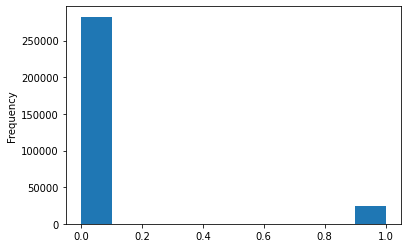

In [60]:
print(app_train['TARGET'].value_counts())
app_train['TARGET'].astype(int).plot.hist();

In [61]:
app_train['DAYS_BIRTH'].isna().sum()

0

# Application Kernel 

## Création de la table homeCredit (Train + Test data) 

In [62]:
homeCredit, cat_apptrain, oricatcol_apptrain = application_train_test(path_train='../data/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv',
                       path_test='../data/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv',
                       num_rows=None,
                       nan_as_category=False)

hello
shape of df after contatenation train and test (356255, 122)
shape of train after recode Geneder XNA (356251, 122)
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
shape of df after one hot encoding (356251, 242)
shape of df after feature computing (356251, 247)


In [63]:
homeCredit= homeCredit.set_index('SK_ID_CURR')

In [64]:
homeCredit.head(2)

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,False,True,False,True,False,0.067329,0.498036,202500.0,0.121978,0.060749
100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,False,False,False,True,False,0.070862,0.208736,135000.0,0.132217,0.027598


In [65]:
homeCredit.shape

(356251, 246)

## Bureau et Balance

In [66]:
bureau_agg, cat_bb, oricatcol_bb, cat_bureau, oricatcol_bureau = bureau_and_balance(path_bureau='../data/Projet+Mise+en+prod+-+home-credit-default-risk/bureau.csv',
                   path_balance='../data/Projet+Mise+en+prod+-+home-credit-default-risk/bureau_balance.csv',
                   num_rows=None,
                   nan_as_category=True)

In [67]:
bureau_agg.head(2)   

,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,...,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_SUM,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.0,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-51.0,0.0,35.0,140.0
100002,-1437,-103,-874.0,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-47.0,0.0,15.0,90.0


In [68]:
bureau_agg.shape

(305811, 116)

## Previous applications

In [69]:
#3
previous_app, cat_cols_prevapp, oricatcol_prevapp = previous_applications(path_prevapp='../data/Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv',
                                     num_rows=None, 
                                     nan_as_category=True)

In [70]:
previous_app.head(2) 

,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MIN,...,REFUSED_HOUR_APPR_PROCESS_START_MAX,REFUSED_HOUR_APPR_PROCESS_START_MEAN,REFUSED_RATE_DOWN_PAYMENT_MIN,REFUSED_RATE_DOWN_PAYMENT_MAX,REFUSED_RATE_DOWN_PAYMENT_MEAN,REFUSED_DAYS_DECISION_MIN,REFUSED_DAYS_DECISION_MAX,REFUSED_DAYS_DECISION_MEAN,REFUSED_CNT_PAYMENT_MEAN,REFUSED_CNT_PAYMENT_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.5,23787.0,23787.0,23787.0,1.044079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.0,179055.0,179055.0,179055.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
previous_app.shape

(338857, 249)

# POS Cach balance

In [72]:
#4
posCachBalance, cat_cols_posCashBalance, oricatcol_posCashBalance = pos_cash(path_poscash='../data/Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv',
         num_rows=None, nan_as_category=True)

In [73]:
posCachBalance.head(2) 

,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN,POS_NAME_CONTRACT_STATUS_Approved_MEAN,POS_NAME_CONTRACT_STATUS_Canceled_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Demand_MEAN,POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN,POS_NAME_CONTRACT_STATUS_Signed_MEAN,POS_NAME_CONTRACT_STATUS_XNA_MEAN,POS_NAME_CONTRACT_STATUS_nan_MEAN,POS_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,
100001,-53,-72.555556,9,7,0.777778,7,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,9
100002,-1,-10.000000,19,0,0.000000,0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,19


In [74]:
posCachBalance.shape

(337252, 18)

# Installments payments

In [75]:
#5
installPayment, cat_cols_installpayment, oricatcol_installpayment = installments_payments(path_installments = '../data/Projet+Mise+en+prod+-+home-credit-default-risk/installments_payments.csv',
                      num_rows=None, nan_as_category=True)

In [76]:
installPayment.head(2)

,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,INSTAL_DPD_SUM,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,2,11.0,1.571429,11.0,36.0,8.857143,62.0,1.0,1.0,7.0,...,5885.132143,41195.925,3951.000,17397.900,5885.132143,41195.925,-1628.0,-2195.000000,-15365.0,7
100002,2,0.0,0.000000,0.0,31.0,20.421053,388.0,1.0,1.0,19.0,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19


In [77]:
installPayment.shape

(339587, 26)

In [78]:
print('Duplicated SK_ID_CURR in homeCredit:',homeCredit.index.duplicated().sum())
print('Duplicated SK_ID_CURR in bureau_agg:',bureau_agg.index.duplicated().sum())
print('Duplicated SK_ID_CURR in previous_app:',previous_app.index.duplicated().sum())
print('Duplicated SK_ID_CURR in posCachBalance:',posCachBalance.index.duplicated().sum())
print('Duplicated SK_ID_CURR in installPayment:',installPayment.index.duplicated().sum())

Duplicated SK_ID_CURR in homeCredit: 0
Duplicated SK_ID_CURR in bureau_agg: 0
Duplicated SK_ID_CURR in previous_app: 0
Duplicated SK_ID_CURR in posCachBalance: 0
Duplicated SK_ID_CURR in installPayment: 0


# Jointures des données

In [79]:
joint_data = homeCredit.join([bureau_agg, previous_app, posCachBalance,installPayment], how='inner')

In [80]:
joint_data.shape

(288390, 655)

# Collecte des noms des variables réencodée (one hot encodings):

In [81]:
info_cat_cols = {'apptrain':{'onehot_cols':cat_apptrain,'catcols':oricatcol_apptrain},
                 'prevapp':{'onehot_cols':cat_cols_prevapp, 'catcols':oricatcol_prevapp},
                 'bb':{'onehot_cols':cat_bb,'catcols':oricatcol_bb},
                 'bureau':{'onehot_cols':cat_bureau,'catcols':oricatcol_bureau},
                 'posCashBalance':{'onehot_cols':cat_cols_posCashBalance,'catcols':oricatcol_posCashBalance},
                 'installpayment':{'onehot_cols':cat_cols_installpayment,'catcols':oricatcol_installpayment}
                }
onehot_cols_list = []
for i, j in info_cat_cols.items():
    onehot_cols_list.append(j["onehot_cols"])
all_onehot_cols=sum(onehot_cols_list,[])

# Valeurs manquantes

## Selection des features avec un taux de remplissage > 50%

In [82]:
kept_feature = list(joint_data.isna().sum().index[joint_data.isna().sum()/joint_data.shape[0]<0.5])
joint_data_50miss = joint_data[kept_feature].copy()

In [83]:
# Exclure toutes les lignes dont les target sont inconnu
joint_data_50miss = joint_data_50miss.loc[~joint_data_50miss['TARGET'].isna(),:]

In [84]:
suffixe = ["_MAX","_MIN","_SUM","_VAR","_MODE","_AVG"] 
total_colonnes = joint_data_50miss.columns
for i in suffixe:
    total_colonnes = total_colonnes[~total_colonnes.str.endswith(i)]
joint_data_50miss_clear1 = joint_data_50miss[total_colonnes]

In [85]:
# Number of each type of column
joint_data_50miss.dtypes.value_counts()

float64    376
bool       133
int64       56
Name: count, dtype: int64

In [86]:
joint_data_50miss_clear1.shape

(247028, 459)

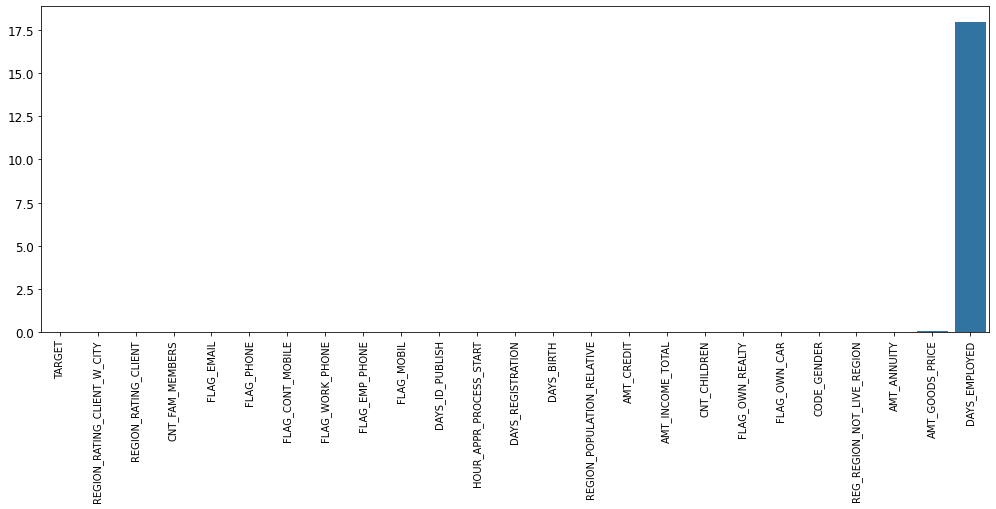

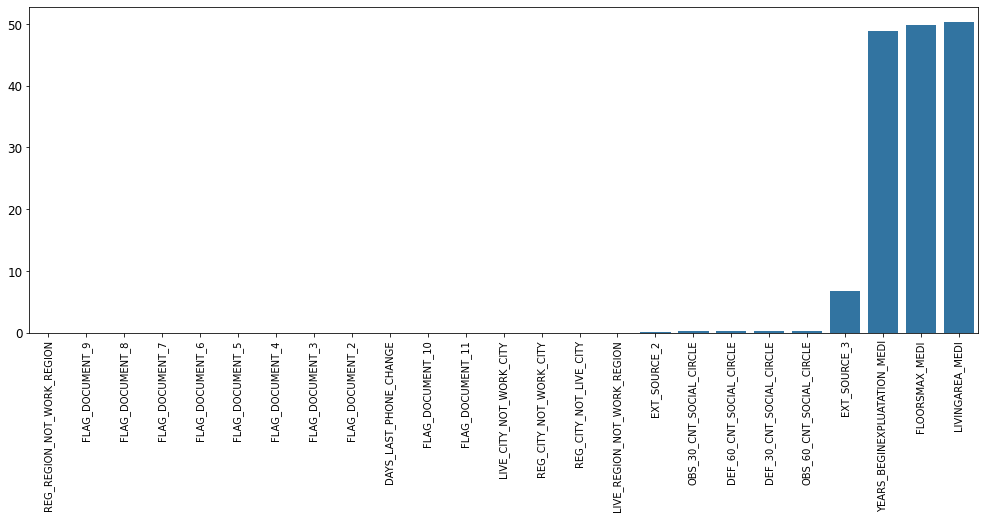

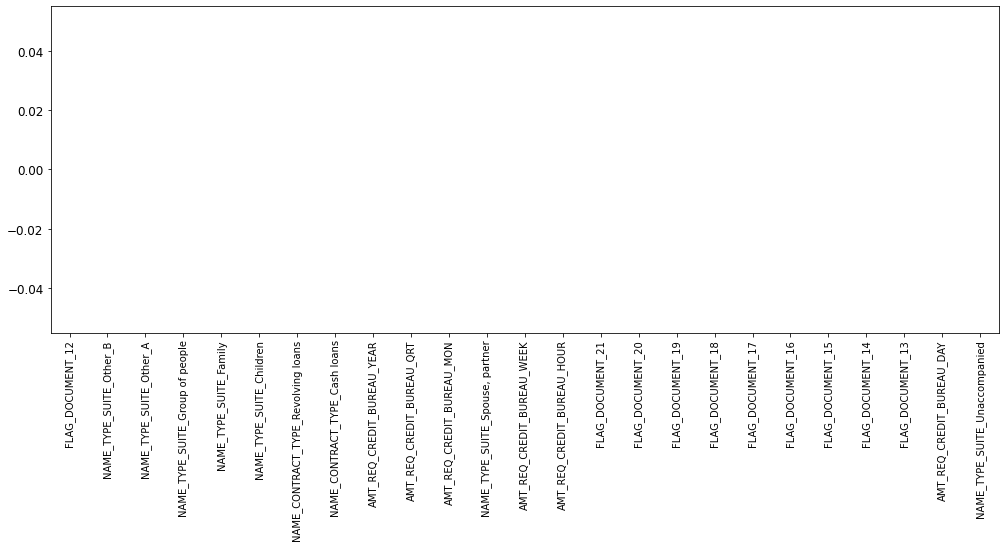

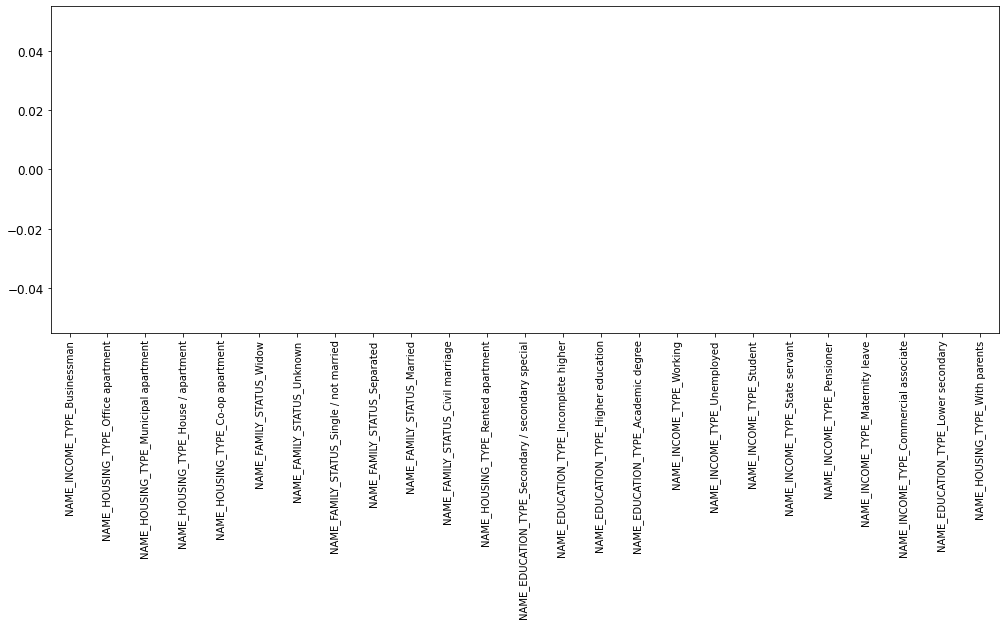

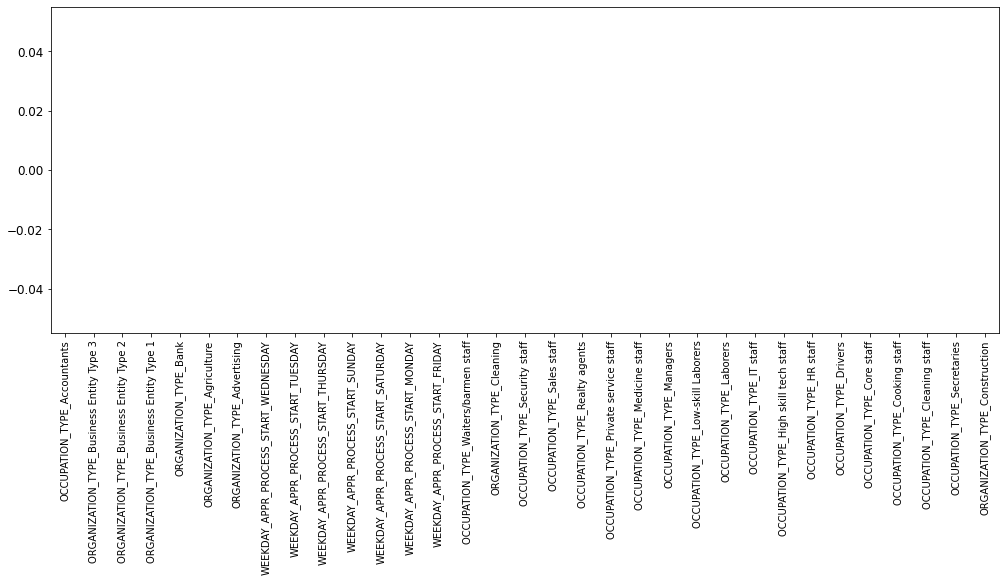

In [87]:
plt.figure(figsize=(17, 6))  
ax = sb.barplot((joint_data_50miss_clear1.iloc[:,0:25].isna().sum()*100/joint_data_50miss_clear1.iloc[:,0:25].shape[0]).sort_values() )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(17, 6))  
ax = sb.barplot((joint_data_50miss_clear1.iloc[:,25:50].isna().sum()*100/joint_data_50miss_clear1.iloc[:,25:50].shape[0]).sort_values() )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(17, 6))  
ax = sb.barplot((joint_data_50miss_clear1.iloc[:,50:75].isna().sum()*100/joint_data_50miss_clear1.iloc[:,50:75].shape[0]).sort_values() )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(17, 6))  
ax = sb.barplot((joint_data_50miss_clear1.iloc[:,75:100].isna().sum()*100/joint_data_50miss_clear1.iloc[:,75:100].shape[0]).sort_values() )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(17, 6))  
ax = sb.barplot((joint_data_50miss_clear1.iloc[:,100:133].isna().sum()*100/joint_data_50miss_clear1.iloc[:,100:133].shape[0]).sort_values() )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.show()

In [88]:
res_describe = joint_data_50miss_clear1.describe()
res_describe

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,POS_COUNT,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MEAN,INSTAL_DBD_MEAN,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_COUNT
count,247028.000000,247028.000000,247028.000000,247028.000000,247028.000000,2.470280e+05,2.470280e+05,247017.000000,2.468070e+05,247028.000000,...,247028.00000,247028.000000,247028.000000,247028.000000,247011.000000,247022.000000,2.470280e+05,2.470220e+05,247022.000000,247028.000000
mean,0.078064,0.667843,0.346653,0.294610,0.429623,1.698130e+05,5.984664e+05,27089.199383,5.376714e+05,0.020590,...,30.06462,2.308710,1.049402,12.290366,1.392841,-385.908628,1.864222e+04,1.902674e+04,-935.565002,40.404282
std,0.268273,0.470988,0.475905,0.455868,0.730906,2.538563e+05,3.942043e+05,14036.886026,3.606640e+05,0.013483,...,24.46051,1.820684,8.883646,9.054209,30.441122,5252.225760,2.324917e+04,2.506037e+04,584.741120,41.119592
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,...,1.00000,1.000000,0.000000,0.000000,0.333333,-337496.805000,0.000000e+00,3.132000e+01,-2943.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16681.500000,2.385000e+05,0.010006,...,12.00000,1.000000,0.000000,6.750000,0.952830,0.000000,7.899108e+03,7.576393e+03,-1323.567926,12.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.575000e+05,5.185620e+05,25042.500000,4.500000e+05,0.018850,...,23.00000,2.000000,0.043478,10.150000,1.000000,0.000000,1.271083e+04,1.237473e+04,-834.036304,26.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34668.000000,6.795000e+05,0.028663,...,40.00000,3.000000,0.525000,15.133333,1.000000,455.940470,2.167960e+04,2.167350e+04,-457.000000,51.000000
max,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,3.956274e+06,225000.000000,3.825000e+06,0.072508,...,295.00000,53.000000,1885.386364,295.000000,8482.446155,146145.900000,2.291331e+06,2.291331e+06,-7.000000,372.000000


In [89]:
df = joint_data_50miss_clear1.copy()
df.shape

(247028, 459)

In [90]:
df.apply(lambda x: len(x.unique())).sort_values().head()

PREV_NAME_PRODUCT_TYPE_nan_MEAN     1
NAME_INCOME_TYPE_Maternity leave    1
PREV_CHANNEL_TYPE_nan_MEAN          1
NAME_INCOME_TYPE_Businessman        1
NAME_FAMILY_STATUS_Unknown          1
dtype: int64

In [91]:
df = df[res_describe.columns[(res_describe.loc['std',:]!=0).values]]

In [92]:
df.apply(lambda x: len(x.unique())).sort_values().head()

TARGET                     2
FLAG_DOCUMENT_15           2
REG_CITY_NOT_WORK_CITY     2
LIVE_CITY_NOT_WORK_CITY    2
FLAG_DOCUMENT_21           2
dtype: int64

In [93]:
cardinality = (df.drop(['TARGET'],axis = 1).apply(lambda x: len(x.unique())))
print(cardinality.sort_values().head())
prop_cardinality = cardinality/df.shape[0]
prop_cardinality.head()

CODE_GENDER                                   2
BURO_CREDIT_TYPE_Mobile operator loan_MEAN    2
REG_REGION_NOT_LIVE_REGION                    2
REG_REGION_NOT_WORK_REGION                    2
LIVE_REGION_NOT_WORK_REGION                   2
dtype: int64


CODE_GENDER         0.000008
FLAG_OWN_CAR        0.000008
FLAG_OWN_REALTY     0.000008
CNT_CHILDREN        0.000061
AMT_INCOME_TOTAL    0.006327
dtype: float64

In [94]:
df.to_csv("../data/non_imputed_working_data.csv")

In [95]:
df = pd.read_csv("../data/non_imputed_working_data.csv",index_col= 0)

In [96]:
df.shape

(247028, 304)

<Axes: >

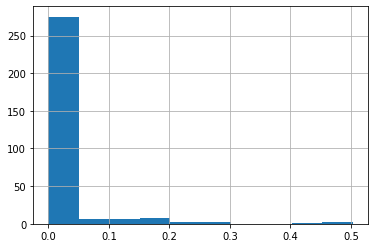

In [97]:
(df.isna().sum()/df.shape[0]).hist()

In [98]:
# Exemple de col_caracteristics pour la simulation
col_caracteristics = feature_prop(df=df)

In [99]:
df['TARGET']

SK_ID_CURR
100002    1.0
100003    0.0
100004    0.0
100007    0.0
100008    0.0
         ... 
456247    0.0
456249    0.0
456253    0.0
456254    1.0
456255    0.0
Name: TARGET, Length: 247028, dtype: float64

## Selection de variable avant imputation

In [100]:
# Calculer les corrélations de Pearson entre chaque caractéristique et la cible
# refaire pour 50
corr = df.corr(method='pearson')

In [101]:
# Extraire la valeur de corrélation entre 'X' et 'TARGET'
correlation_value = corr.loc[:,'TARGET']

In [102]:
selected_variables=list(correlation_value[1::].abs().sort_values(ascending=False).head(20).index)
selected_variables.append('TARGET')

In [103]:
df_filter=df[selected_variables]

In [ ]:
imputer = KNNImputer(n_neighbors=10)
df_filter=df_filter.sample(frac=0.2).copy()
imputed_df=imputer.fit_transform(df_filter)

In [ ]:
imputed_df.shape

In [ ]:
df_imputed = pd.DataFrame(imputed_df,columns=df_filter.columns,index=df_filter.index)

In [ ]:
df_imputed.to_csv('../data/imputed_working_data.csv')